<a href="https://colab.research.google.com/github/CamK2/ComputerVision/blob/main/cvzone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We will use colab Code Snippets to grab an image from the webcam.

We will then download an image of Niagara Falls using !wget

Next we will use [cvzone](https://github.com/cvzone/cvzone) to do human body segmentation, and overlay the body onto the falls.

**cvzone** is a python module available as a public github repository.
**git** is a program for a version control system. The containers that git places files and their version histories and comments in is called a *repository*.

**github** is a website offering free public hosting of your repositories.
It also has a nice interface for displaying jupyter notebooks.

### Install Google Code snippet for web cam captures.

G to menu: Insert/Code Snippets/Camera Capture --> Click on the "+"

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


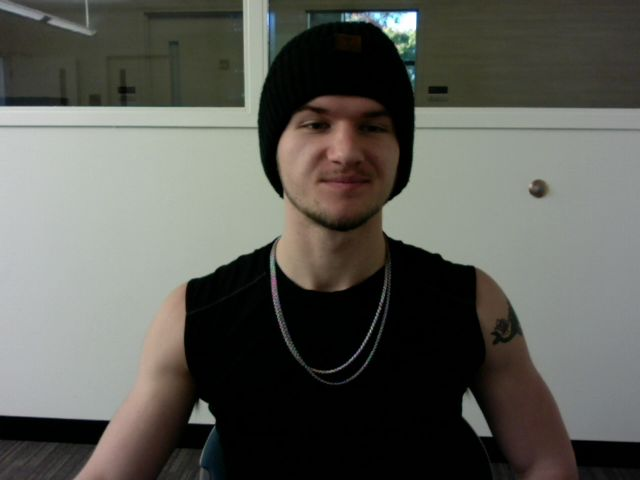

In [4]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [5]:
#get a picture of the falls
!wget "https://upload.wikimedia.org/wikipedia/commons/a/ab/3Falls_Niagara.jpg"

--2022-10-24 17:00:24--  https://upload.wikimedia.org/wikipedia/commons/a/ab/3Falls_Niagara.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3712403 (3.5M) [image/jpeg]
Saving to: ‘3Falls_Niagara.jpg’

3Falls_Niagara.jpg  100%[===================>]   3.54M  10.6MB/s    in 0.3s    

2022-10-24 17:00:25 (10.6 MB/s) - ‘3Falls_Niagara.jpg’ saved [3712403/3712403]

--2022-10-24 17:00:25--  http://as/
Resolving as (as)... failed: No address associated with hostname.
wget: unable to resolve host address ‘as’
--2022-10-24 17:00:25--  http://falls.jpg/
Resolving falls.jpg (falls.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘falls.jpg’
FINISHED --2022-10-24 17:00:25--
Total wall clock time: 0.9s
Downloaded: 1 files, 3.5M in 0.3s (10.6 MB/s)


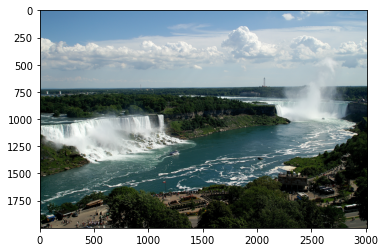

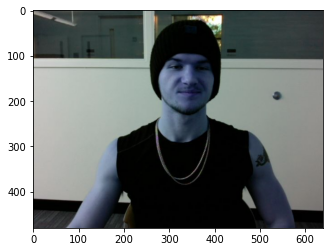

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

background = plt.imread("3Falls_Niagara.jpg")
me = cv2.imread("photo.jpg")
plt.imshow(background)
plt.show()
plt.imshow(me)


In [11]:
# install cvzone
!pip install cvzone
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cvzone: filename=cvzone-1.5.6-py3-none-any.whl size=18768 sha256=7b1fca4f8cc9ff84c2fa902fb5ca1d6f304c9b26012cd021e0e10ef8411601ed
  Stored in directory: /root/.cache/pip/wheels/c1/e8/e9/80f482161ba9f5dcf4832b76ac70540edd11a3136a58445c52
Successfully built cvzone
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.4 MB/s 


In [18]:
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import imageio
from google.colab.patches import cv2_imshow
from cvzone import overlayPNG



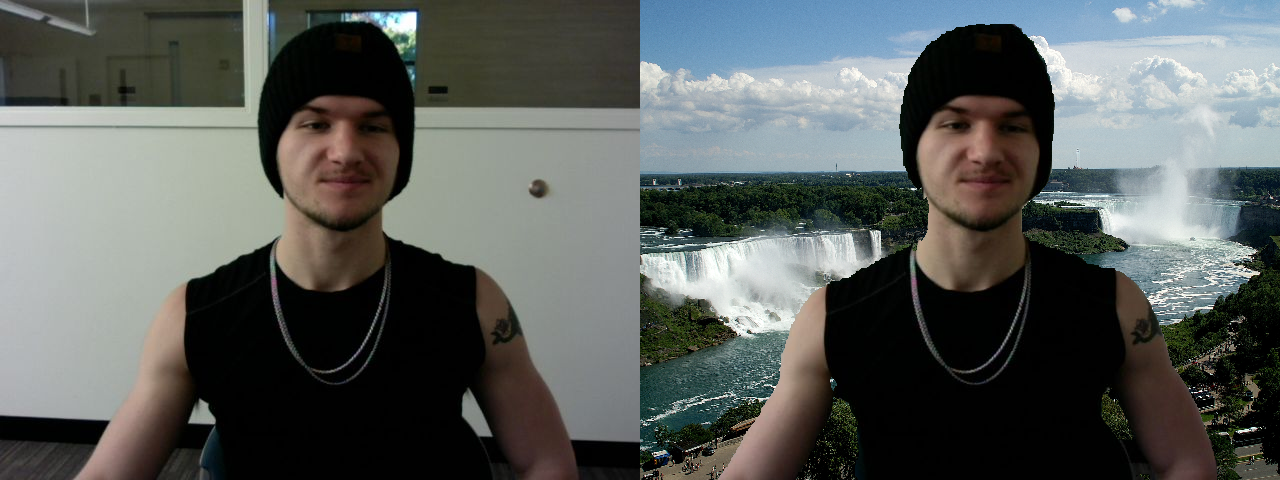

In [19]:
background = cv2.imread("3Falls_Niagara.jpg")
me = cv2.imread('photo.jpg')
background = cv2.resize(background,(me.shape[1], me.shape[0]))

segmentor = SelfiSegmentation()
imgOut = segmentor.removeBG(me, background, threshold=0.8)

imgStack = cvzone.stackImages([me, imgOut], 2,1)
cv2_imshow(imgStack)